In [1]:
import osmnx as ox
import igraph as ig
import pandas as pd
import networkx as nx
import numpy as np
import multiprocessing as mp
import time
import random as rd
from itertools import product
import ast
from numpy import inf
import matplotlib.pyplot as plt
import collections
import time
from IPython.display import clear_output
import shapely

ox.config(log_console=True, use_cache=True, cache_folder = '/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Experiment/Network_Data') ## Path da pasta onde estao os jsons

In [2]:
from Amsterdam_data import Amsterdam_data
from Berlin_data import Berlin_data
from Boston_data import Boston_data
from Fortaleza_data import Fortaleza_data
from Lisbon_data import Lisbon_data
from Madrid_data import Madrid_data
from Manhattan_data import Manhattan_data
from Paris_data import Paris_data
from Rome_data import Rome_data
from San_Francisco_data import San_Francisco_data

In [11]:
cities_names = ['Amsterdam', 'Berlin', 'Boston', 'Fortaleza', 'Lisbon', 'Madrid', 'Manhattan', 'Paris', 'Rome', 'San_Francisco']

In [3]:
functions = [Amsterdam_data, Berlin_data, Boston_data, Fortaleza_data, Lisbon_data, Madrid_data, Manhattan_data, Paris_data, Rome_data, San_Francisco_data]

In [4]:
def get_coords(pol):
    

    if type(pol) == shapely.geometry.multipolygon.MultiPolygon:
        x_coords = []
        y_coords = []
        pols = list(pol)

        for p in pols:
            coords = list(p.exterior.coords)
            x_coords.append([val[0] for val in coords])
            y_coords.append([val[1] for val in coords])
            
    else:
        coords = list(pol.exterior.coords)
        x_coords = [val[0] for val in coords]
        y_coords = [val[1] for val in coords]
    
    return x_coords, y_coords

In [5]:
%%time
data = [functions[i]() for i in range(len(functions))]

CPU times: user 1h 33min 45s, sys: 4.02 s, total: 1h 33min 49s
Wall time: 1h 33min 51s


In [7]:
params2 = (val[0] for val in data)
pool = mp.Pool(3)
data_coords = pool.map(get_coords, params2)
pool.close()
pool.join()

In [8]:
poly_x_coords = [val[0] for val in data_coords]
poly_y_coords = [val[1] for val in data_coords]

In [9]:
colors = [['indianred' if data[j][2][i] == True else 'steelblue' for i in range(len(data[j][2]))] for j in range(len(data))]

CPU times: user 2min 4s, sys: 332 ms, total: 2min 5s
Wall time: 2min 5s


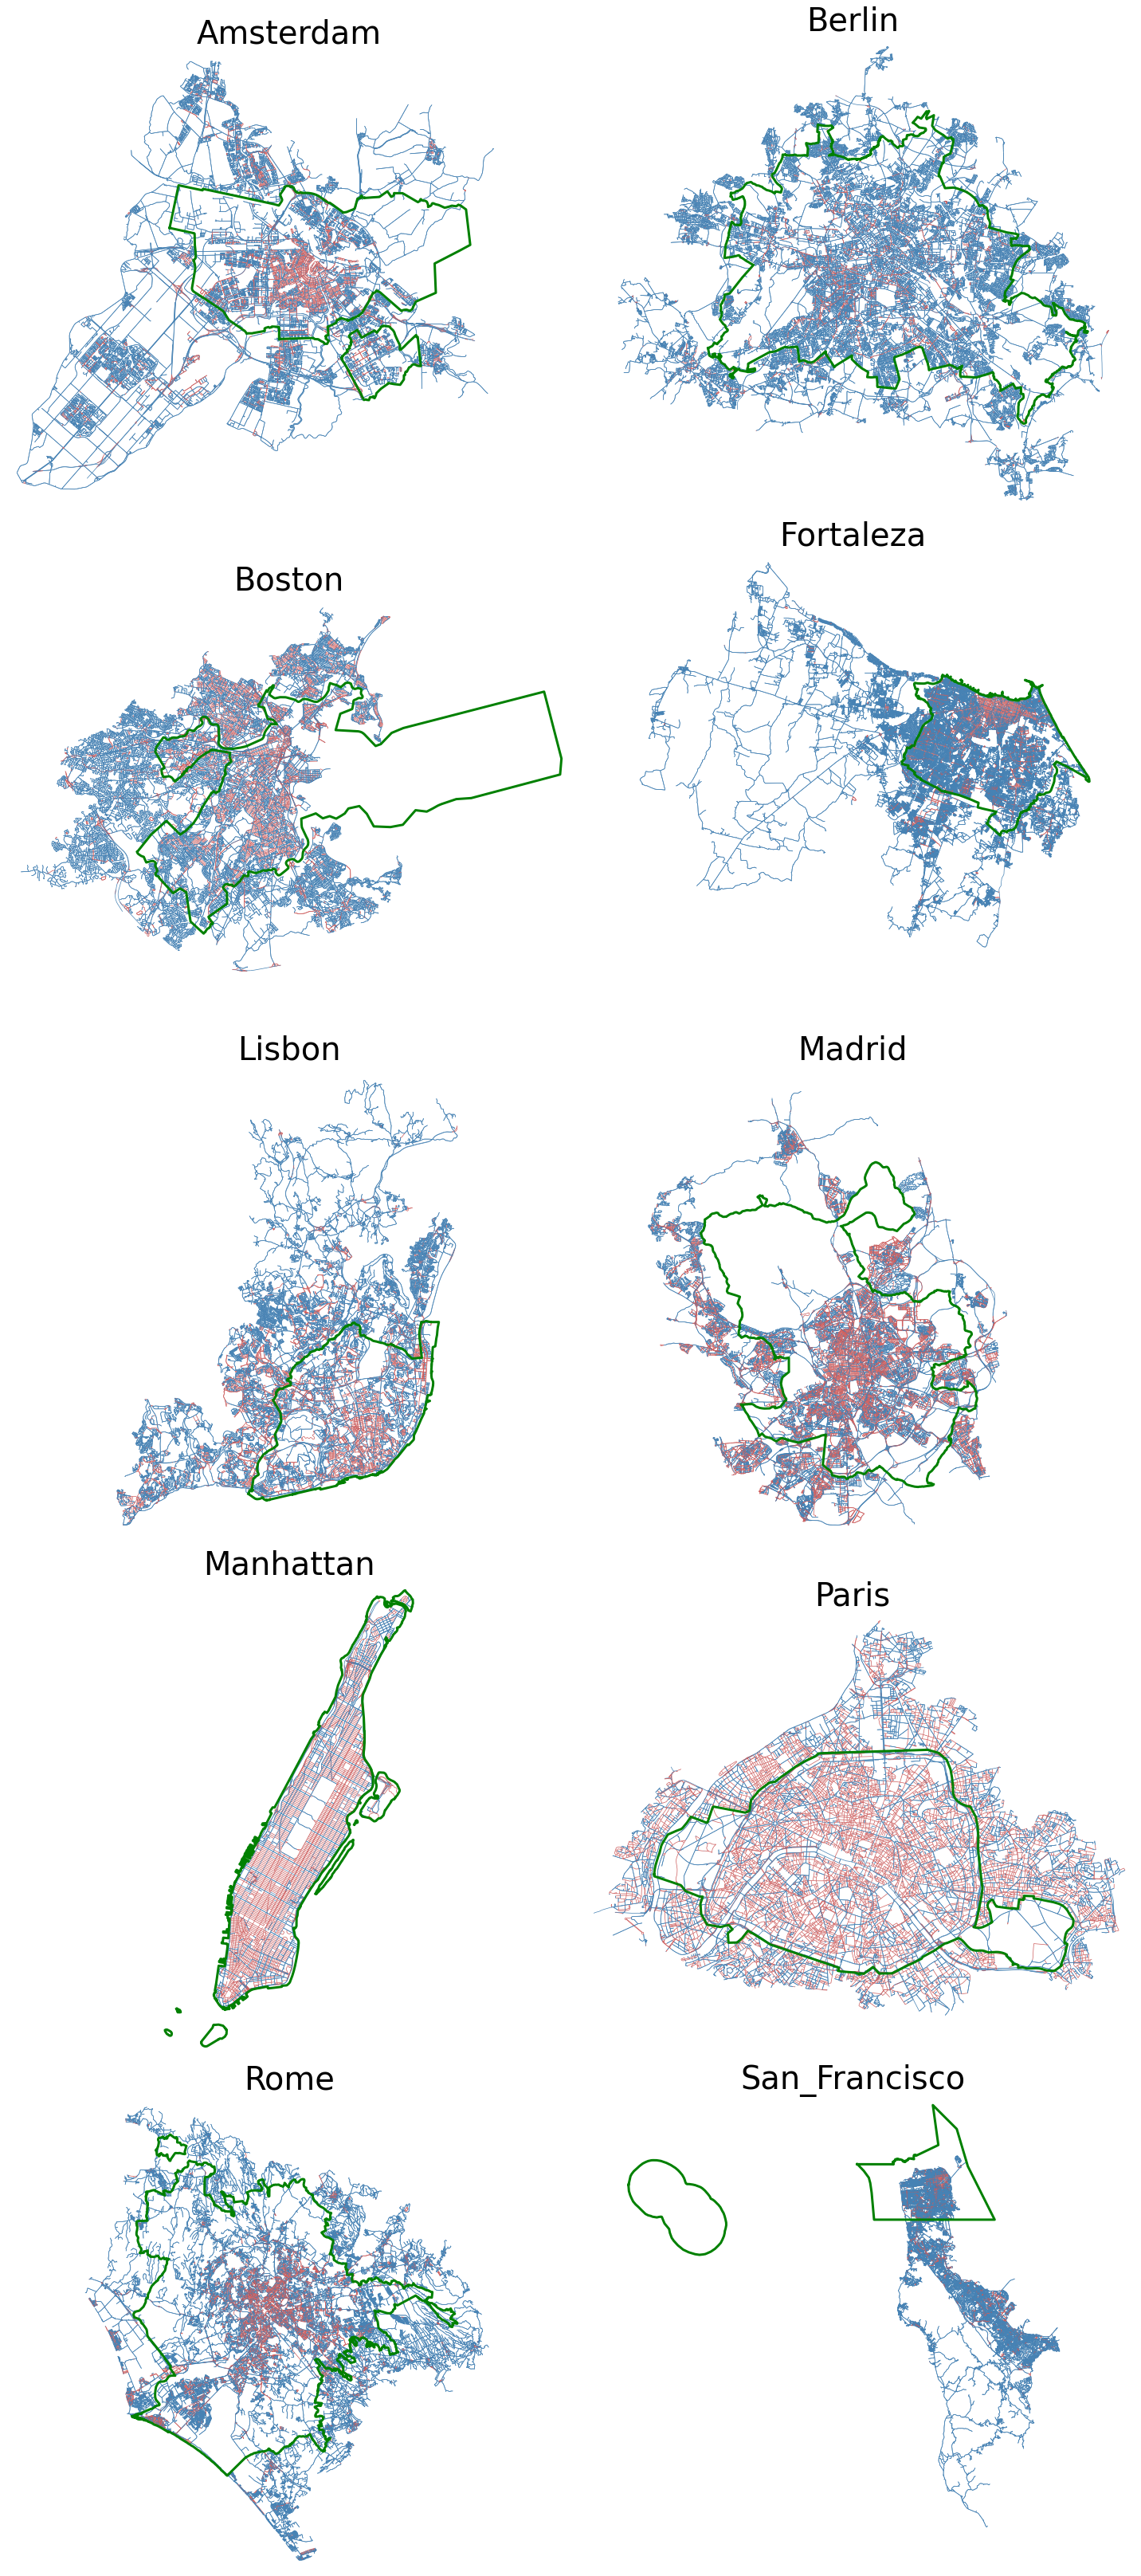

In [12]:
%%time
#fig, ax = plt.subplots(5,2, figsize=(20,45))
fig, ax = plt.subplots(5,2, figsize=(20,45))

ax = ax.ravel()

for i in range(len(cities_names)):
    
    city_map = ox.plot.plot_graph(data[i][1], ax=ax[i], node_size=0, edge_color= colors[i],
                                  edge_linewidth=0.7, show=False, bgcolor = 'white', figsize=(30,20))
    
    if type(poly_x_coords[i][0])==list:
        
        for j in range(len(poly_x_coords[i])):
            ax[i].plot(poly_x_coords[i][j], poly_y_coords[i][j], color='green', linewidth=3)
    
    else:
        ax[i].plot(poly_x_coords[i], poly_y_coords[i], color='green', linewidth=3)
    
    ax[i].set_title(cities_names[i], fontsize=40)
    
    margin = 0.02
    west, south, east, north = data[i][3].unary_union.bounds
    margin_ns = (north - south) * margin
    margin_ew = (east - west) * margin
    ax[i].set_ylim((south - margin_ns, north + margin_ns))
    ax[i].set_xlim((west - margin_ew, east + margin_ew))
    
fig.set_frameon(True)

fig.tight_layout()

In [15]:
fig.savefig('/Suplemental_maps.png', bbox_inches='tight', dpi = 300) 